# 2. Cluster Validation (RFM) - Online Retail

**Goal:** Determine optimal segments for real-world customer data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load RFM Data
rfm = pd.read_csv('../data/processed/rfm_data.csv', index_col='CustomerID')

# Log Transform to Handle Skew
rfm_log = np.log1p(rfm)

# Scale
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)

## 1. Elbow Method

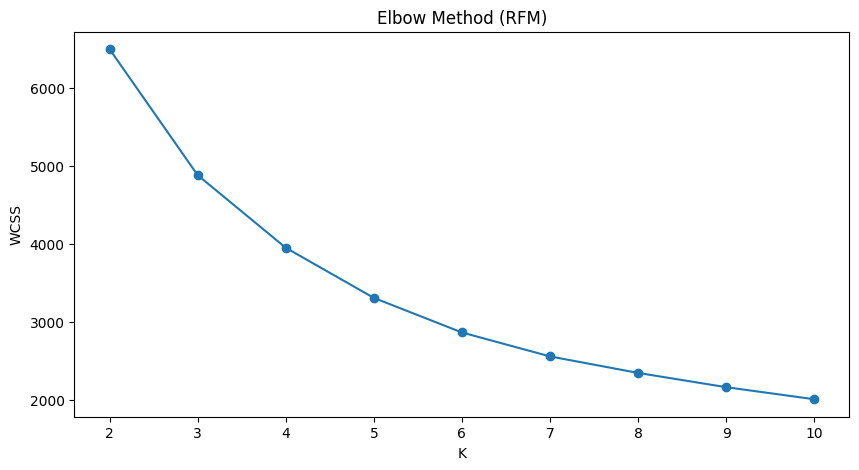

In [2]:
wcss = []
range_k = range(2, 11)

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range_k, wcss, marker='o')
plt.title('Elbow Method (RFM)')
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

## 2. Silhouette Analysis

Real data rarely produces perfect separation. We look for a local maximum.

In [3]:
for k in [3, 4, 5]:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(rfm_scaled)
    score = silhouette_score(rfm_scaled, labels)
    print(f"K={k}, Silhouette Score: {score:.3f}")

print("\n✅ Conclusion: K=4 seems to offer the best balance of granularity and separation.")

K=3, Silhouette Score: 0.339


K=4, Silhouette Score: 0.336


K=5, Silhouette Score: 0.316

✅ Conclusion: K=4 seems to offer the best balance of granularity and separation.
